In [4]:
#Importar librerías:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import factorial
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.api import Poisson
from scipy import stats
from scipy.stats import norm
from statsmodels.iolib.summary2 import summary_col

In [3]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.5 MB 5.7 MB/s eta 0:00:01     |█▍                              | 399 kB 5.7 MB/s eta 0:00:02     |███▏                            | 931 kB 5.7 MB/s eta 0:00:02     |████████▊                       | 2.6 MB 5.7 MB/s eta 0:00:02     |█████████████████▋              | 5.2 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 38.4 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


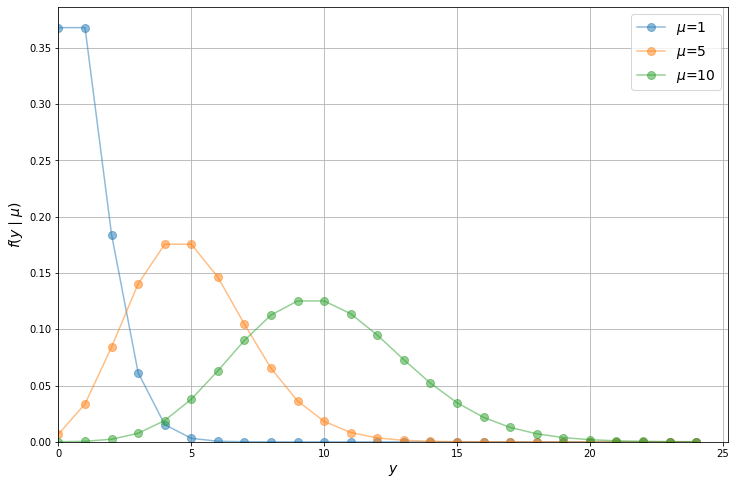

In [5]:
#Podemos graficar la distribución de Poisson sobre y para diferentes valores de μ
poisson_pmf = lambda y, μ: μ**y / factorial(y) * exp(-μ)
y_values = range(0, 25)

fig, ax = plt.subplots(figsize=(12, 8))

for μ in [1, 5, 10]:
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(y_i, μ))
    ax.plot(y_values,
            distribution,
            label=f'$\mu$={μ}',
            alpha=0.5,
            marker='o',
            markersize=8)

ax.grid()
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$f(y \mid \mu)$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)

plt.show()

In [6]:
pd.options.display.max_columns = 10

# Carga de datos.
df = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/mle/fp.dta?raw=true')
df.head()

country  ccode    year    cyear  numbil  ...   topint08     rintr  \
0  United States    2.0  1990.0  21990.0     NaN  ...  39.799999  4.988405   
1  United States    2.0  1991.0  21991.0     NaN  ...  39.799999  4.988405   
2  United States    2.0  1992.0  21992.0     NaN  ...  39.799999  4.988405   
3  United States    2.0  1993.0  21993.0     NaN  ...  39.799999  4.988405   
4  United States    2.0  1994.0  21994.0     NaN  ...  39.799999  4.988405   

   noyrs  roflaw  nrrents  
0   20.0    1.61      NaN  
1   20.0    1.61      NaN  
2   20.0    1.61      NaN  
3   20.0    1.61      NaN  
4   20.0    1.61      NaN  

[5 rows x 36 columns]

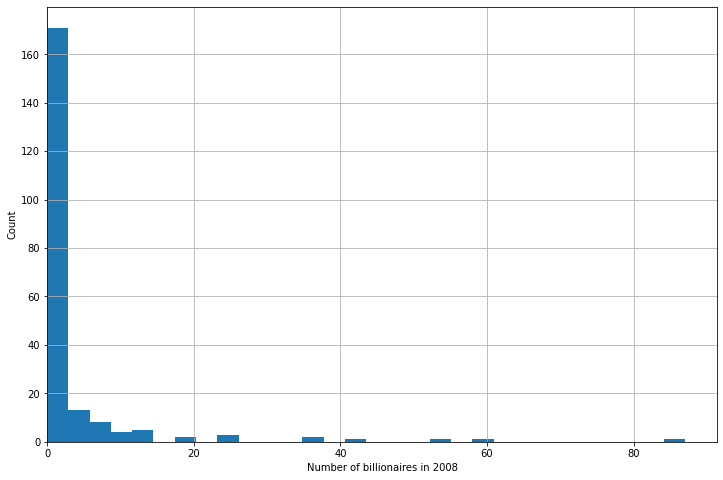

In [7]:
#Histograma de datos:
numbil0_2008 = df[(df['year'] == 2008) & (
    df['country'] != 'United States')].loc[:, 'numbil0']

plt.subplots(figsize=(12, 8))
plt.hist(numbil0_2008, bins=30)
plt.xlim(left=0)
plt.grid()
plt.xlabel('Number of billionaires in 2008')
plt.ylabel('Count')
plt.show()

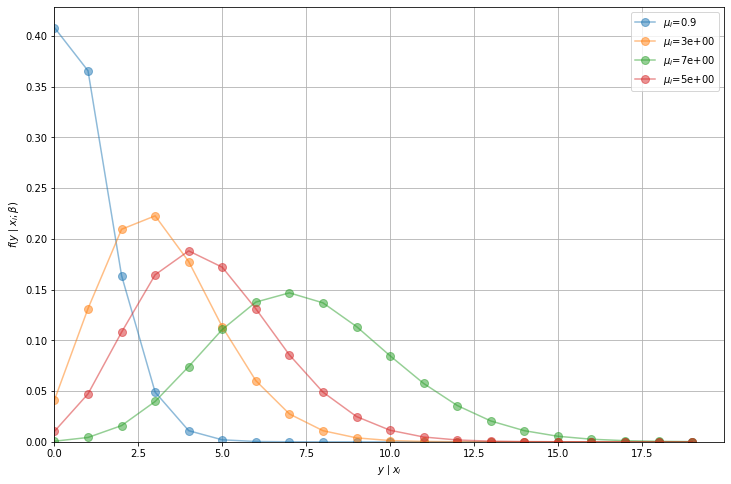

In [8]:
#Usamos nuestra función poisson_pmf de arriba y valores arbitrarios para β y xi
y_values = range(0, 20)

# Define a parameter vector with estimates
β = np.array([0.26, 0.18, 0.25, -0.1, -0.22])

# Create some observations X
datasets = [np.array([0, 1, 1, 1, 2]),
            np.array([2, 3, 2, 4, 0]),
            np.array([3, 4, 5, 3, 2]),
            np.array([6, 5, 4, 4, 7])]


fig, ax = plt.subplots(figsize=(12, 8))

for X in datasets:
    μ = exp(X @ β)
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(y_i, μ))
    ax.plot(y_values,
            distribution,
            label=f'$\mu_i$={μ:.1}',
            marker='o',
            markersize=8,
            alpha=0.5)

ax.grid()
ax.legend()
ax.set_xlabel('$y \mid x_i$')
ax.set_ylabel(r'$f(y \mid x_i; \beta )$')
ax.axis(xmin=0, ymin=0)
plt.show()

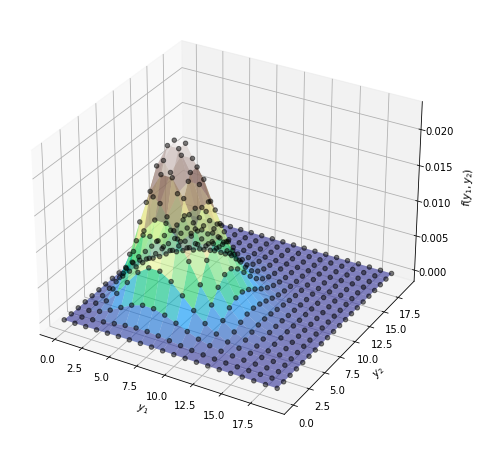

In [17]:
#Primero, necesitamos construir la función de verosimilitud (β), que es similar a una función de densidad de probabilidad conjunta
def plot_joint_poisson(μ=7, y_n=20):
    yi_values = np.arange(0, y_n, 1)

    # Create coordinate points of X and Y
    X, Y = np.meshgrid(yi_values, yi_values)

    # Multiply distributions together
    Z = poisson_pmf(X, μ) * poisson_pmf(Y, μ)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z.T, cmap='terrain', alpha=0.6)
    ax.scatter(X, Y, Z.T, color='black', alpha=0.5, linewidths=1)
    ax.set(xlabel='$y_1$', ylabel='$y_2$')
    ax.set_zlabel('$f(y_1, y_2)$', labelpad=10)
    plt.show()

plot_joint_poisson(μ=7, y_n=20)